In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
land_prices_df = pd.read_csv('AL_11_D151_20200925.csv', encoding='euc-kr', usecols=[2,5,6,8])
land_prices_df.shape

C:\Users\나\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(29393777, 12)

In [5]:
land_price_since_2006_df = prac_df[prac_df['기준년도'] >= 2006]
land_price_since_2006_df.shape

(13772806, 12)

In [6]:
land_price_since_2006_df['표준지여부'].value_counts()

N    13328661
Y      444145
Name: 표준지여부, dtype: int64

In [7]:
land_price_since_2006_df['특수지구분명'].value_counts()

일반    13532391
산       240415
Name: 특수지구분명, dtype: int64

In [11]:
simple_cols = ['법정동명', '지번', '기준년도', '공시지가']
simple_land_price_since_2006_df = land_price_since_2006_df[simple_cols]
simple_land_price_since_2006_df.shape

(13772806, 4)

In [12]:
simple_land_price_since_2006_df.head()

,법정동명,지번,기준년도,공시지가
16,서울특별시 종로구 청운동,1,2006,2420000
17,서울특별시 종로구 청운동,1,2007,2580000
18,서울특별시 종로구 청운동,1,2008,2830000
19,서울특별시 종로구 청운동,1,2009,2770000
20,서울특별시 종로구 청운동,1,2010,2840000


In [13]:
simple_land_price_since_2006_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13772806 entries, 16 to 29393776
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   법정동명    object
 1   지번      object
 2   기준년도    int64 
 3   공시지가    int64 
dtypes: int64(2), object(2)
memory usage: 525.4+ MB


In [17]:
def bon_bun_allocator(x):
    splitted = x.split('-')
    return int(splitted[0])

def bu_bun_allocator(x):
    splitted = x.split('-')
    if len(splitted) == 2:
        return int(splitted[1])
    elif len(splitted) == 1:
        return 0
    else:
        print('error')
        return

In [22]:
def full_address_allocator(df):
    bonbun = df['지번'].apply(bon_bun_allocator)
    bubun = df['지번'].apply(bu_bun_allocator)
    df['전체주소'] = df['법정동명'] + ' ' + bonbun.apply(str) + '-' + bubun.apply(str)
    
    return df[['전체주소', '기준년도', '공시지가']]

SyntaxError: invalid syntax (<ipython-input-22-2165f8ec4bdd>, line 6)

In [19]:
simple_land_prices_df = full_address_allocator(simple_land_price_since_2006_df)
simple_land_prices_df.shape

C:\Users\나\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(13772806, 3)

In [20]:
simple_land_prices_df.head()

,전체주소,기준년도,공시지가
16,서울특별시 종로구 청운동 1-0,2006,2420000
17,서울특별시 종로구 청운동 1-0,2007,2580000
18,서울특별시 종로구 청운동 1-0,2008,2830000
19,서울특별시 종로구 청운동 1-0,2009,2770000
20,서울특별시 종로구 청운동 1-0,2010,2840000


In [21]:
simple_land_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13772806 entries, 16 to 29393776
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   전체주소    object
 1   기준년도    int64 
 2   공시지가    int64 
dtypes: int64(2), object(1)
memory usage: 420.3+ MB


In [23]:
simple_land_prices_df.columns = ['전체주소', '년', '공시지가']
simple_land_prices_df.head()

,전체주소,년,공시지가
16,서울특별시 종로구 청운동 1-0,2006,2420000
17,서울특별시 종로구 청운동 1-0,2007,2580000
18,서울특별시 종로구 청운동 1-0,2008,2830000
19,서울특별시 종로구 청운동 1-0,2009,2770000
20,서울특별시 종로구 청운동 1-0,2010,2840000


In [329]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 04A9-8968

 C:\Users\나\Desktop\업무\Data Analysis 디렉터리

2020-12-03  오후 01:36    <DIR>          .
2020-12-03  오후 01:36    <DIR>          ..
2020-12-01  오전 09:46    <DIR>          .ipynb_checkpoints
2020-09-26  오전 05:40     3,248,970,693 AL_11_D151_20200925.csv
2020-11-09  오전 04:11     1,353,694,054 AL_11_D155_20201107.csv
2020-11-21  오후 07:52               315 debug.log
2020-12-03  오후 01:11           233,801 EDA.ipynb
2020-11-24  오후 03:05        87,232,378 entrc_seoul.txt
2020-12-02  오후 05:00           348,527 Practice.ipynb
2020-10-01  오전 12:06       113,220,086 공시지가_2020년.csv
2020-12-02  오전 10:56           432,892 서울_오피스텔_2020_01_01_2020_10_31.ipynb
2020-12-02  오후 02:43    <DIR>          서울시 부동산 실거래가 정보
2020-12-03  오전 11:02    <DIR>          오피스텔 실거래가
2020-11-21  오후 12:52           664,632 오피스텔(매매)_실거래가_20201121.xlsx
               9개 파일       4,804,797,378 바이트
               5개 디렉터리  132,697,821,184 바이트 남음


In [144]:
!dir "./서울시 부동산 실거래가 정보"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 04A9-8968

 C:\Users\나\Desktop\업무\Data Analysis\서울시 부동산 실거래가 정보 디렉터리

2020-12-02  오후 02:43    <DIR>          .
2020-12-02  오후 02:43    <DIR>          ..
2020-12-02  오후 02:17        42,505,034 서울특별시_부동산_실거래가_정보_2006년.csv
2020-12-02  오후 02:34        29,893,662 서울특별시_부동산_실거래가_정보_2007년.csv
2020-12-02  오후 02:34        29,957,370 서울특별시_부동산_실거래가_정보_2008년.csv
2020-12-02  오후 02:35        28,528,310 서울특별시_부동산_실거래가_정보_2009년.csv
2020-12-02  오후 02:36        19,061,906 서울특별시_부동산_실거래가_정보_2010년.csv
2020-12-02  오후 02:36        22,949,196 서울특별시_부동산_실거래가_정보_2011년.csv
2020-12-02  오후 02:36        16,553,456 서울특별시_부동산_실거래가_정보_2012년.csv
2020-12-02  오후 02:37        21,736,318 서울특별시_부동산_실거래가_정보_2013년.csv
2020-12-02  오후 02:37        28,745,759 서울특별시_부동산_실거래가_정보_2014년.csv
2020-12-02  오후 02:38        43,008,295 서울특별시_부동산_실거래가_정보_2015년.csv
2020-12-02  오후 02:39        42,505,801 서울특별시_부동산_실거래가_정보_2016년.csv
2020-12-02  오후 02:40        38,114,004 서울특별시_부동산_실거래가_정보_2017년.csv
2020-12-

In [150]:
os.listdir('./서울시 부동산 실거래가 정보/')

['서울특별시_부동산_실거래가_정보_2006년.csv',
 '서울특별시_부동산_실거래가_정보_2007년.csv',
 '서울특별시_부동산_실거래가_정보_2008년.csv',
 '서울특별시_부동산_실거래가_정보_2009년.csv',
 '서울특별시_부동산_실거래가_정보_2010년.csv',
 '서울특별시_부동산_실거래가_정보_2011년.csv',
 '서울특별시_부동산_실거래가_정보_2012년.csv',
 '서울특별시_부동산_실거래가_정보_2013년.csv',
 '서울특별시_부동산_실거래가_정보_2014년.csv',
 '서울특별시_부동산_실거래가_정보_2015년.csv',
 '서울특별시_부동산_실거래가_정보_2016년.csv',
 '서울특별시_부동산_실거래가_정보_2017년.csv',
 '서울특별시_부동산_실거래가_정보_2018년.csv',
 '서울특별시_부동산_실거래가_정보_2019년.csv',
 '서울특별시_부동산_실거래가_정보_2020년_20200630.csv']

In [171]:
def land_number_allocator(x):
    try:
        return str(int(x))
    except:
        return x

In [172]:
def full_address_allocator(df):
    
    df['전체주소'] = '서울특별시' + ' ' + df['자치구명'] + ' ' + df['법정동명'] + ' '\
                    + df['지번코드'].apply(str).str[-8:-4].apply(land_number_allocator) + '-'\
                    + df['지번코드'].apply(str).str[-4:].apply(land_number_allocator)
    
    simple_cols = ['전체주소', '신고년도', '대지권면적', '건물면적', '층정보', '물건금액', '건축년도']
    
    return df[simple_cols].dropna().drop_duplicates()

In [250]:
def create_officetel_prices_df():
    basedir = './서울시 부동산 실거래가 정보/'
    filenames = os.listdir(basedir)
    
    dfs_list = []
    
    for filename in filenames:
        if filename.endswith('.csv'):
            try:
                df = pd.read_csv(basedir + filename, encoding='euc-kr', low_memory=False).drop_duplicates()
            except:
                df = pd.read_csv(basedir + filename, low_memory=False).drop_duplicates()
            officetel_df = df[df['건물주용도'] == '오피스텔']
            officetel_df['물건금액'] = officetel_df['물건금액'] / 10000
            
            dfs_list.append(full_address_allocator(officetel_df))
    
    concat_df = pd.concat(dfs_list).reset_index(drop=True)
    
    concat_df['층정보'] = concat_df['층정보'].astype(int)
    concat_df['건축년도'] = concat_df['건축년도'].astype(int)
    
    return concat_df

In [251]:
%%time
officetel_prices_df = create_officetel_prices_df()
officetel_prices_df.shape

C:\Users\나\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\나\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\나\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\나\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\나\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\나\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Wall time: 14 s


C:\Users\나\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\나\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(148978, 7)

In [252]:
officetel_prices_df.head()

,전체주소,신고년도,대지권면적,건물면적,층정보,물건금액,건축년도
0,서울특별시 강동구 길동 386-8,2006,40.68,33.20,2,4200.0,1990
1,서울특별시 강동구 천호동 451-20,2006,38.74,28.43,12,9250.0,2003
2,서울특별시 강동구 천호동 155-5,2006,31.43,31.43,12,8500.0,2004
3,서울특별시 강동구 길동 386-8,2006,70.19,57.27,8,9000.0,1990
4,서울특별시 강동구 길동 413-1,2006,46.79,30.65,9,7350.0,2002


In [253]:
officetel_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148978 entries, 0 to 148977
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   전체주소    148978 non-null  object 
 1   신고년도    148978 non-null  int64  
 2   대지권면적   148978 non-null  float64
 3   건물면적    148978 non-null  float64
 4   층정보     148978 non-null  int32  
 5   물건금액    148978 non-null  float64
 6   건축년도    148978 non-null  int32  
dtypes: float64(3), int32(2), int64(1), object(1)
memory usage: 6.8+ MB


In [254]:
officetel_prices_df['대지권면적'].describe()

count    148978.000000
mean         52.844933
std          59.809275
min           3.170000
25%          35.200000
50%          43.310000
75%          58.460000
max        5835.000000
Name: 대지권면적, dtype: float64

In [255]:
officetel_prices_df['건물면적'].describe()

count    148978.000000
mean         39.504490
std          22.952742
min           7.400000
25%          26.000000
50%          32.115000
75%          43.420000
max         644.890000
Name: 건물면적, dtype: float64

In [256]:
officetel_prices_df['대지권비율'] = officetel_prices_df['건물면적'] / officetel_prices_df['대지권면적']

In [257]:
officetel_prices_df['대지권비율'].describe()

count    148978.000000
mean          0.753097
std           0.107365
min           0.005141
25%           0.707317
50%           0.742084
75%           0.780968
max           5.527116
Name: 대지권비율, dtype: float64

<AxesSubplot:>

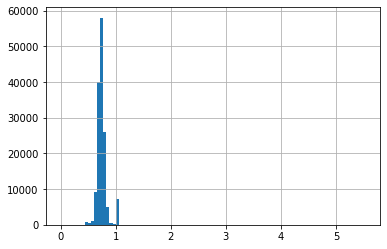

In [258]:
officetel_prices_df['대지권비율'].hist(bins=100)

In [259]:
prac_df = officetel_prices_df[(officetel_prices_df['대지권비율'] < officetel_prices_df['대지권비율'].quantile(0.995)) & \
                                          (officetel_prices_df['대지권비율'] > officetel_prices_df['대지권비율'].quantile(0.005))]

<AxesSubplot:>

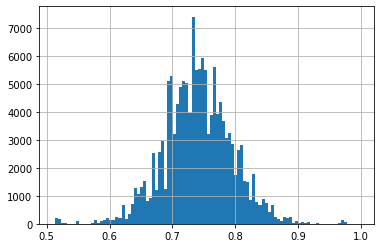

In [260]:
prac_df['대지권비율'].hist(bins=100)

In [261]:
prac_df['물건금액'].describe()

count    140807.000000
mean      19218.601462
std       15954.636846
min        1172.000000
25%       10900.000000
50%       15400.000000
75%       22800.000000
max      650000.000000
Name: 물건금액, dtype: float64

<AxesSubplot:>

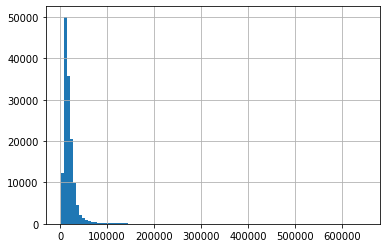

In [263]:
prac_df['물건금액'].hist(bins=100)

In [264]:
max_df = prac_df[prac_df['물건금액'] == prac_df['물건금액'].max()]
max_df.shape

(1, 8)

In [266]:
max_df

,전체주소,신고년도,대지권면적,건물면적,층정보,물건금액,건축년도,대지권비율
140767,서울특별시 강남구 청담동 4-1,2019,433.82,316.88,22,650000.0,2007,0.730441


In [267]:
price_df = prac_df[(prac_df['물건금액'] < prac_df['물건금액'].quantile(0.995))]
price_df.shape

(140101, 8)

In [268]:
price_df.head()

,전체주소,신고년도,대지권면적,건물면적,층정보,물건금액,건축년도,대지권비율
0,서울특별시 강동구 길동 386-8,2006,40.68,33.20,2,4200.0,1990,0.816126
1,서울특별시 강동구 천호동 451-20,2006,38.74,28.43,12,9250.0,2003,0.733867
3,서울특별시 강동구 길동 386-8,2006,70.19,57.27,8,9000.0,1990,0.815928
4,서울특별시 강동구 길동 413-1,2006,46.79,30.65,9,7350.0,2002,0.655054
5,서울특별시 강동구 천호동 161-17,2006,32.05,23.12,8,5750.0,2003,0.721373


<AxesSubplot:>

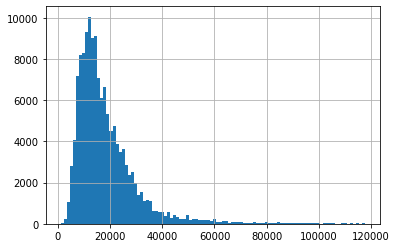

In [270]:
price_df['물건금액'].hist(bins=100)

In [271]:
main_data_df = prac_df.copy()

In [272]:
print(main_data_df.shape)
main_data_df.head()

(140807, 8)


,전체주소,신고년도,대지권면적,건물면적,층정보,물건금액,건축년도,대지권비율
0,서울특별시 강동구 길동 386-8,2006,40.68,33.20,2,4200.0,1990,0.816126
1,서울특별시 강동구 천호동 451-20,2006,38.74,28.43,12,9250.0,2003,0.733867
3,서울특별시 강동구 길동 386-8,2006,70.19,57.27,8,9000.0,1990,0.815928
4,서울특별시 강동구 길동 413-1,2006,46.79,30.65,9,7350.0,2002,0.655054
5,서울특별시 강동구 천호동 161-17,2006,32.05,23.12,8,5750.0,2003,0.721373


In [273]:
main_data_df['건물나이'] = main_data_df['신고년도'] - main_data_df['건축년도']
main_data_df.head()

,전체주소,신고년도,대지권면적,건물면적,층정보,물건금액,건축년도,대지권비율,건물나이
0,서울특별시 강동구 길동 386-8,2006,40.68,33.20,2,4200.0,1990,0.816126,16
1,서울특별시 강동구 천호동 451-20,2006,38.74,28.43,12,9250.0,2003,0.733867,3
3,서울특별시 강동구 길동 386-8,2006,70.19,57.27,8,9000.0,1990,0.815928,16
4,서울특별시 강동구 길동 413-1,2006,46.79,30.65,9,7350.0,2002,0.655054,4
5,서울특별시 강동구 천호동 161-17,2006,32.05,23.12,8,5750.0,2003,0.721373,3


In [274]:
main_data_df['건물나이'].describe()

count    140807.000000
mean          8.277863
std           5.742203
min           0.000000
25%           4.000000
50%           7.000000
75%          12.000000
max          40.000000
Name: 건물나이, dtype: float64

In [24]:
main_data_df.columns = ['전체주소', '년', '대지권면적(㎡)', '전용면적(㎡)', '층', '가격(만원)', '건축년도', '대지권비율', '건물나이']
main_data_df.head()

NameError: name 'main_data_df' is not defined

In [217]:
!dir "./오피스텔 실거래가/"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 04A9-8968

 C:\Users\나\Desktop\업무\Data Analysis\오피스텔 실거래가 디렉터리

2020-12-03  오전 11:02    <DIR>          .
2020-12-03  오전 11:02    <DIR>          ..
2020-12-03  오전 10:59           469,010 오피스텔(매매)_실거래가_2006.xlsx
2020-12-03  오전 10:59           793,983 오피스텔(매매)_실거래가_2007.xlsx
2020-12-03  오전 10:58           848,348 오피스텔(매매)_실거래가_2008.xlsx
2020-12-03  오전 10:24           740,437 오피스텔(매매)_실거래가_2009.xlsx
2020-12-03  오전 10:23           698,530 오피스텔(매매)_실거래가_2010.xlsx
2020-12-03  오전 10:22           612,479 오피스텔(매매)_실거래가_2011.xlsx
2020-12-03  오전 10:21           419,417 오피스텔(매매)_실거래가_2012.xlsx
2020-12-03  오전 10:20           404,378 오피스텔(매매)_실거래가_2013.xlsx
2020-12-03  오전 10:19           508,651 오피스텔(매매)_실거래가_2014.xlsx
2020-12-03  오전 10:19           708,430 오피스텔(매매)_실거래가_2015.xlsx
2020-12-03  오전 10:17           699,917 오피스텔(매매)_실거래가_2016.xlsx
2020-12-03  오전 10:16           643,457 오피스텔(매매)_실거래가_2017.xlsx
2020-12-03  오전 10:15           637,416 오피스텔(매매)_실거래가_2018.xlsx

In [277]:
def create_secondary_officetel_prices_df():
    basedir = './오피스텔 실거래가/'
    filenames = os.listdir(basedir)
    
    dfs_list = []
    
    for filename in filenames:
        if filename.endswith('.xlsx'):
            df = pd.read_excel(basedir + filename, header=16).drop_duplicates()
            
            df['전체주소'] = df['시군구'] + ' ' + df['번지']
            
            df['신고년도'] = df['계약년월'].apply(str).str[:4]
            df['월'] = df['계약년월'].apply(str).str[4:]
            
            df['거래금액(만원)'] = df['거래금액(만원)'].str.replace(',', '').apply(float)
            
            
            simple_cols = ['전체주소', '전용면적(㎡)', '신고년도', '월', '거래금액(만원)', '층', '건축년도']
            
            dfs_list.append(df[simple_cols].dropna())
    
    concat_df = pd.concat(dfs_list).reset_index(drop=True)
    
    concat_df['건축년도'] = concat_df['건축년도'].astype(int)
    
    return concat_df

In [278]:
%%time
secondary_officetel_prices_df = create_secondary_officetel_prices_df()
secondary_officetel_prices_df.shape

Wall time: 30 s


(161919, 7)

In [281]:
secondary_officetel_prices_df.columns = ['전체주소', '전용면적(㎡)', '신고년도', '월', '가격(만원)', '층', '건축년도']

In [282]:
secondary_officetel_prices_df.head()

,전체주소,전용면적(㎡),신고년도,월,가격(만원),층,건축년도
0,서울특별시 강남구 개포동 13-3,32.44,2006,01,6400.0,8,1997
1,서울특별시 강남구 개포동 13-3,32.44,2006,01,7100.0,7,1997
2,서울특별시 강남구 개포동 13-3,32.44,2006,01,7300.0,11,1997
3,서울특별시 강남구 개포동 13-3,31.91,2006,01,7500.0,10,1997
4,서울특별시 강남구 개포동 13-3,32.44,2006,01,7400.0,15,1997


In [283]:
secondary_officetel_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161919 entries, 0 to 161918
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   전체주소     161919 non-null  object 
 1   전용면적(㎡)  161919 non-null  float64
 2   신고년도     161919 non-null  object 
 3   월        161919 non-null  object 
 4   가격(만원)   161919 non-null  float64
 5   층        161919 non-null  int64  
 6   건축년도     161919 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 8.0+ MB


In [3]:
%%time
land_plans_df = pd.read_csv('AL_11_D155_20201107.csv', encoding='euc-kr', low_memory=False).drop_duplicates()
coordinates_df = pd.read_csv('entrc_seoul.txt', sep='|', header=None, low_memory=False).drop_duplicates()
land_prices_df = pd.read_csv('공시지가_2020년.csv', encoding='euc-kr', low_memory=False).drop_duplicates()

Wall time: 48.6 s


In [6]:
print(land_plans_df.shape)
land_plans_df.head()

(8455920, 13)


,고유번호,법정동코드,법정동명,대장구분코드,대장구분명,지번,도면번호,저촉여부코드,저촉여부,용도지역지구코드,용도지역지구명,등록일자,데이터기준일자
0,1111010100100010000,1111010100,서울특별시 종로구 청운동,1,토지대장,1,12900001111020080001UNE2010001001,1,포함,UNE201,대공방어협조구역(위탁고도:54-236m),2009-12-29,2020-06-09
1,1111010100100010000,1111010100,서울특별시 종로구 청운동,1,토지대장,1,13404001111020080001UOA1200010002,2,저촉,UOA120,상대보호구역,2009-12-28,2020-06-09
2,1111010100100010000,1111010100,서울특별시 종로구 청운동,1,토지대장,1,15000001111020000000UQA01X0000001,1,포함,UQA01X,도시지역,2009-12-28,2020-06-09
3,1111010100100010000,1111010100,서울특별시 종로구 청운동,1,토지대장,1,15000001111020000000UQF1100071000,2,저촉,UQF110,자연경관지구,2009-12-28,2020-06-09
4,1111010100100010000,1111010100,서울특별시 종로구 청운동,1,토지대장,1,15000001111020000000UQS1000507000,2,저촉,UQS100,도로,2009-12-28,2020-06-09


In [56]:
land_plans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8455920 entries, 0 to 8455919
Data columns (total 13 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   고유번호      int64 
 1   법정동코드     int64 
 2   법정동명      object
 3   대장구분코드    int64 
 4   대장구분명     object
 5   지번        object
 6   도면번호      object
 7   저촉여부코드    int64 
 8   저촉여부      object
 9   용도지역지구코드  object
 10  용도지역지구명   object
 11  등록일자      object
 12  데이터기준일자   object
dtypes: int64(4), object(9)
memory usage: 1.2+ GB


In [178]:
def land_plans_full_address_allocator(df):
    bonbun = df['지번'].apply(bon_bun_allocator)
    bubun = df['지번'].apply(bu_bun_allocator)
    
    df['전체주소'] = df['법정동명'] + ' ' + bonbun.apply(str) + '-' + bubun.apply(str)
    
    simple_cols = ['전체주소', '용도지역지구명']
    df = df[simple_cols]
    
    return df.dropna().drop_duplicates()

In [179]:
simple_land_plans_df = land_plans_full_address_allocator(land_plans_df)
simple_land_plans_df.shape

(7798079, 2)

In [180]:
simple_land_plans_df.head()

,전체주소,용도지역지구명
0,서울특별시 종로구 청운동 1-0,대공방어협조구역(위탁고도:54-236m)
1,서울특별시 종로구 청운동 1-0,상대보호구역
2,서울특별시 종로구 청운동 1-0,도시지역
3,서울특별시 종로구 청운동 1-0,자연경관지구
4,서울특별시 종로구 청운동 1-0,도로


In [195]:
def land_plan_unstack(df):
    
    df['이진항'] = 1
    df = df.set_index(['전체주소', '용도지역지구명'])
    df = df.unstack(-1, 0).reset_index()
    
    cols = df.columns
    new_cols = []
    for i in range(len(cols)):
        if i == 0:
            new_cols.append(cols[i][0])
        else:
            new_cols.append(cols[i][1])
    
    df.columns = new_cols
    
    return df

In [196]:
simple_land_plans_unstack_df = land_plan_unstack(simple_land_plans_df)
simple_land_plans_unstack_df.shape

(933503, 330)

In [197]:
simple_land_plans_unstack_df.head()

,전체주소,(한강)오염행위 제한지역,(한강)폐기물매립시설 설치제한지역,가로구역별 최고높이 제한지역,가스공급설비,가스공급시설,가축사육제한구역,개발제한구역,개발진흥지구,개발행위허가제한지역,건축선,건축용도지역기타,건축용도지역미분류,건축허가·착공제한지역,경관광장,경관녹지,경관지구,경관지구기타,고가도로,고도지구,고등학교,고속철도,고압선,공간시설미분류,공공공지,공공도서관,공공문화체육시설미분류,공공시설구역,공공시설용지,공공주택지구,공공지원민간임대주택 공급촉진지구,공공청사,공동구,공설화장시설,공원,공원마을지구(공원집단시설지구),공원문화유산지구,공원자연보존지구,공원자연환경지구,공익용산지,공익임지,공장설립승인지역,공장설립제한지역,공항,공항소음피해예상지역,공항소음피해지역,과밀억제권역,광로1류(폭 70M 이상),광로2류(폭 50M~70M),광로3류(폭 40M~50M),광역계획구역,광역복합환승센터,광장,교육환경보호구역,교차점광장,교통광장,교통운수시설미분류,국가산업단지,국가지정문화재구역,국가하천,국립공원,국민임대주택단지예정지구,국지도로,국토이용기타용도지구,국토이용용도지구기타,군사기지 및 군사시설 보호구역,궤도,근린공원,근린광장,근린상업지역,기타공공공지시설,기타공공청사시설,기타공원시설,기타교통시설,기타녹지시설,기타도로시설,기타도시공간시설,기타도시방재시설,기타문화시설,기타방송통신시설,기타보건위생시설,기타사회복지시설,기타수도시설,기타시장시설,기타열공급설비,기타용도지역지구기타,기타용도지역지구미분류,기타용지,기타유통및공급시설,기타유통업무설비,기타자동차정류장,기타전기공급설비,기타주차장시설,기타철도시설,기타폐기물처리시설,기타하수도시설,기타학교시설,기타환경기초시설,노외주차장,녹지,농수산물공판장및농수산물종합유통센터,대공방어협조구역,대공방어협조구역(위탁고도:54-236m),대공방어협조구역(위탁고도:77-257m),대로1류(폭 35M~40M),대로2류(폭 30M~35M),대로3류(폭 25M~30M),대학,도로,도로구역,도서관,도시개발구역,도시개발구역기타,도시고속도로,도시관리계획 입안중,도시기타용도지역지구기타,도시기타용도지역지구미분류,도시기타용도지역지구용도지역지구,도시자연공원,도시자연공원구역,도시지역,도시지역기타,도시철도,등록문화재구역,묘지공원,문화공원,문화시설,문화재,문화재보존영향 검토대상구역,문화재보호구역,문화재보호구역기타,문화지구,박물관,방송통신시설,방수설비,방화지구,배수시설,변전소(전원개발사업구역),변전시설,보건위생시설미분류,보전녹지지역,보전산지,보전임지,보존지구,보행자전용도로,부설주차장,비오톱1등급,비행안전제1구역(전술),비행안전제2구역(전술),비행안전제2구역(지원),비행안전제3구역(전술),비행안전제3구역(지원),비행안전제4구역(전술),비행안전제4구역(지원),비행안전제5구역(전술),비행안전제5구역(지원),비행안전제6구역(전술),사고지,사방시설,사방지,사업지역기타,사회복지시설,산업개발진흥지구,산업기술단지,산업시설구역,상대보호구역,상수원보호구역,생산녹지지역,생태·경관보전지역,생태·경관완충보전구역,생태·경관핵심보전구역,소공원,소로1류(폭 10M~12M),소로2류(폭 8M~10M),소로3류(폭 8M 미만),소하천,소하천구역,소하천예정지,수도공급시설,수질오염방지시설,수평표면구역,시·도 생태·경관보전지역,시·도야생생물보호구역,시가지경관지구,시가지조성사업지역,시도지정문화재구역,시장,시장정비구역,시장정비구역기타,시험림구역,아파트지구,액화석유가스충전시설,야생생물보호구역,어린이공원,여객자동차터미널,역사도심,역사문화미관지구,역사문화특화경관지구,역사문화환경보존지역,연결녹지,연구개발특구,연구시설,열공급설비,온천공보호구역,온천원보호지구,완충녹지,용도구역기타,용도구역미분류,용도지구취락지구,운동장,원추표면구역,원형보존지,유류저장및송유설비,유수시설,유수지,유원지,유치원,유통단지,유통상업지역,유통업무설비,일단의공업용지조성사업지역,일단의주택단지조성사업지역,일반광장,일반도로,일반미관지구,일반산업단지,일반상업지역,일반주거지역,일반철도,임업용산지,자동차검사시설,자동차운전학원,자동차전용도로,자동차정류장,자연경관지구,자연공원용도지구기타,자연녹지지역,자연재해위험지구,장애물제한표면구역,재개발구역,재개발구역기타,재정비촉진지구,재정비촉진지구기타,재해위험지구기타,재활용시설,저류시설,전기공급설비,전용주거지역,전이표면구역,전통사찰보존구역,절대보호구역,정비구역,정비구역기타,정비예정구역,제1종일반주거지역,제1종전용주거지역,제1종지구단위계획구역,제2종일반주거지역,제2종전용주거지역,제3종 구역,제3종일반주거지역,제방,제한보호구역,제한보호구역(방공기지 : 1km),제한보호구역(전술항공:5km),제한보호구역(후방지역:500m),조례로정한지역,조망가로미관지구,조망가로특화경관지구,종합운동장,종합의료시설,주간선도로,주거용지,주거환경개선지구,주요시설광장,주차장,주차장기타,주차환경개선지구,준공업지역,준보전산지,준주거지역,중로1류(폭 20M~25M),중로2류(폭 15M~20M),중로3류(폭 12M~15M),중심대광장,중심상업지역,중요시설물보호지구,중요시설물보호지구(공용),중요시설물보호지구(공항),중점경관관리구역,중학교,지구단위계획구역,지역특화발전특구,지원시설구역,지정문화재구역,지하광장,지하도로,진입표면구역,집단취락지구,집산도로,철도,청사,청소년수련시설,체육공원,체육시설,초등학교,취수시설,침수위험지구,택지개발예정지구,택지개발예정지구기타,토지거래계약에관한허가구역,토지구획정리사업지구기타,토지형질변경규제지역,통제보호구역,통제보호구역(민통선이남:300m),통제보호구역(방공기지:500m),특수도로(보행자전용도로),특정개발진흥지구,특화경관지구,폐기물처리및재활용시설,하수도,하수종말처리시설,하천,하천구역,하천미분류,학교,학교이적지,현상변경허가 대상구역,홍수관리구역,환경정비구역
0,서울특별시 강남구 개포동 1-0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,서울특별시 강남구 개포동 100-0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [198]:
simple_land_plans_unstack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933503 entries, 0 to 933502
Columns: 330 entries, 전체주소 to 환경정비구역
dtypes: int64(329), object(1)
memory usage: 2.3+ GB


In [8]:
print(coordinates_df.shape)
coordinates_df.head()

(547306, 18)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,11110,760,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,94,0,NaN,3047,근린생활시설,0,청운효자동,953241.683263,1.954023e+06
1,11110,4933,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,96,0,평안빌,3047,주택,0,청운효자동,953243.258151,1.954034e+06
2,11110,287,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,98,0,청운빌라,3047,주택,0,청운효자동,953240.877646,1.954055e+06
3,11110,1336,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,99,3,풍림팍사이드빌라,3032,주택,1,청운효자동,953195.459364,1.954079e+06
4,11110,6021,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,99,4,경복빌라,3032,주택,1,청운효자동,953193.346779,1.954097e+06


In [9]:
coordinates_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547306 entries, 0 to 547305
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       547306 non-null  int64  
 1   1       547306 non-null  int64  
 2   2       547306 non-null  int64  
 3   3       547306 non-null  object 
 4   4       547306 non-null  object 
 5   5       547306 non-null  object 
 6   6       547306 non-null  int64  
 7   7       547306 non-null  object 
 8   8       547306 non-null  int64  
 9   9       547306 non-null  int64  
 10  10      547306 non-null  int64  
 11  11      120072 non-null  object 
 12  12      547306 non-null  int64  
 13  13      544873 non-null  object 
 14  14      547306 non-null  int64  
 15  15      547026 non-null  object 
 16  16      546866 non-null  float64
 17  17      546866 non-null  float64
dtypes: float64(2), int64(9), object(7)
memory usage: 79.3+ MB


In [296]:
def coordinates_full_address_allocator(df):
    df['전체주소'] = df[3] + ' ' + df[4] + ' ' + df[5] + ' ' + df[9].apply(str) + '-' + df[10].apply(str)
    
    simple_cols = ['전체주소', 16, 17]
    
    df = df[simple_cols]
    df.columns = ['전체주소', 'x좌표', 'y좌표']
    
    return df.dropna().drop_duplicates()

In [297]:
simple_coordinates_df = coordinates_full_address_allocator(coordinates_df)
simple_coordinates_df.shape

(546866, 3)

In [298]:
simple_coordinates_df.head()

,전체주소,x좌표,y좌표
0,서울특별시 종로구 청운동 94-0,953241.683263,1.954023e+06
1,서울특별시 종로구 청운동 96-0,953243.258151,1.954034e+06
2,서울특별시 종로구 청운동 98-0,953240.877646,1.954055e+06
3,서울특별시 종로구 청운동 99-3,953195.459364,1.954079e+06
4,서울특별시 종로구 청운동 99-4,953193.346779,1.954097e+06


In [299]:
simple_coordinates_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546866 entries, 0 to 547305
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   전체주소    546866 non-null  object 
 1   x좌표     546866 non-null  float64
 2   y좌표     546866 non-null  float64
dtypes: float64(2), object(1)
memory usage: 16.7+ MB


In [300]:
simple_coordinates_df['x좌표'].describe()

count    546866.000000
mean     954873.481632
std        7173.184345
min      935361.053341
25%      948920.435220
50%      955750.888176
75%      960356.924594
max      971977.523101
Name: x좌표, dtype: float64

In [301]:
simple_coordinates_df['y좌표'].describe()

count    5.468660e+05
mean     1.950497e+06
std      5.709782e+03
min      1.936900e+06
25%      1.945501e+06
50%      1.950494e+06
75%      1.954618e+06
max      1.966768e+06
Name: y좌표, dtype: float64

In [323]:
def coordinates_feature_engineering(df):
    df['x_norm'] = (df['x좌표'] - df['x좌표'].describe()['min']) / 1000 + 1
    df['x_norm^2'] = df['x_norm']**2
    df['sin(x_norm)'] = df['x_norm'].apply(math.sin)
    df['cos(x_norm)'] = df['x_norm'].apply(math.cos)
    df['tan(x_norm)'] = df['x_norm'].apply(math.tan)
    
    df['y_norm'] = (df['y좌표'] - df['y좌표'].describe()['min']) / 1000 + 1
    df['y_norm^2'] = df['y_norm']**2
    df['sin(y_norm)'] = df['y_norm'].apply(math.sin)
    df['cos(y_norm)'] = df['y_norm'].apply(math.cos)
    df['tan(y_norm)'] = df['y_norm'].apply(math.tan)
    
    cols = ['전체주소', 'x_norm', 'x_norm^2', 'sin(x_norm)', 'cos(x_norm)', 'tan(x_norm)', 'y_norm', 'y_norm^2', 'sin(y_norm)',\
            'cos(y_norm)', 'tan(y_norm)']
    
    return df[cols]

In [324]:
engineered_coordinates_df = coordinates_feature_engineering(simple_coordinates_df)
engineered_coordinates_df.shape

(546866, 11)

In [325]:
engineered_coordinates_df.head()

,전체주소,x_norm,x_norm^2,sin(x_norm),cos(x_norm),tan(x_norm),y_norm,y_norm^2,sin(y_norm),cos(y_norm),tan(y_norm)
0,서울특별시 종로구 청운동 94-0,18.880630,356.478186,0.031069,0.999517,0.031084,18.123108,328.447037,-0.664219,0.747538,-0.888541
1,서울특별시 종로구 청운동 96-0,18.882205,356.537658,0.032643,0.999467,0.032660,18.133917,328.838929,-0.656100,0.754674,-0.869382
2,서울특별시 종로구 청운동 98-0,18.879824,356.447766,0.030264,0.999542,0.030278,18.154395,329.582046,-0.640509,0.767950,-0.834050
3,서울특별시 종로구 청운동 99-3,18.834406,354.734850,-0.015149,0.999885,-0.015151,18.178886,330.471886,-0.621511,0.783405,-0.793346
4,서울특별시 종로구 청운동 99-4,18.832293,354.655276,-0.017262,0.999851,-0.017264,18.197094,331.134238,-0.607144,0.794592,-0.764096


In [328]:
engineered_coordinates_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546866 entries, 0 to 547305
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   전체주소         546866 non-null  object 
 1   x_norm       546866 non-null  float64
 2   x_norm^2     546866 non-null  float64
 3   sin(x_norm)  546866 non-null  float64
 4   cos(x_norm)  546866 non-null  float64
 5   tan(x_norm)  546866 non-null  float64
 6   y_norm       546866 non-null  float64
 7   y_norm^2     546866 non-null  float64
 8   sin(y_norm)  546866 non-null  float64
 9   cos(y_norm)  546866 non-null  float64
 10  tan(y_norm)  546866 non-null  float64
dtypes: float64(10), object(1)
memory usage: 50.1+ MB


In [10]:
print(land_prices_df.shape)
land_prices_df.head()

(909979, 13)


,시도명,시군구명,법정동명,토지코드,공시지가(원/㎡),시군구코드,법정동코드,필지구분코드,필지구분명,본번,부번,기준년도,기준년월
0,서울특별시,성북구,하월곡동,1129013600100820125,851400,11290,13600,1,토지,0082,0125,2020,2020-01-01
1,서울특별시,성북구,하월곡동,1129013600200050003,1452000,11290,13600,2,임야,0005,0003,2020,2020-01-01
2,서울특별시,성북구,하월곡동,1129013600101040169,1801000,11290,13600,1,토지,0104,0169,2020,2020-01-01
3,서울특별시,성북구,하월곡동,1129013600100960051,1006000,11290,13600,1,토지,0096,0051,2020,2020-01-01
4,서울특별시,성북구,하월곡동,1129013600100960119,871200,11290,13600,1,토지,0096,0119,2020,2020-01-01


In [11]:
land_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909979 entries, 0 to 909978
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   시도명        909979 non-null  object
 1   시군구명       909979 non-null  object
 2   법정동명       909979 non-null  object
 3   토지코드       909979 non-null  object
 4   공시지가(원/㎡)  909979 non-null  int64 
 5   시군구코드      909979 non-null  int64 
 6   법정동코드      909979 non-null  int64 
 7   필지구분코드     909979 non-null  int64 
 8   필지구분명      909979 non-null  object
 9   본번         909979 non-null  object
 10  부번         909979 non-null  object
 11  기준년도       909979 non-null  int64 
 12  기준년월       909979 non-null  object
dtypes: int64(5), object(8)
memory usage: 97.2+ MB


In [152]:
def land_prices_full_address_allocator(df):
    df['전체주소'] = df['시도명'] + ' ' + df['시군구명'] + ' ' + df['법정동명'] + ' '\
                    + df['본번'].apply(land_number_allocator) + '-'\
                    + df['부번'].apply(land_number_allocator)
    
    simple_cols = ['전체주소', '공시지가(원/㎡)']
    
    return df[simple_cols].dropna().drop_duplicates()

In [120]:
simple_land_prices_df = land_prices_full_address_allocator(land_prices_df)
simple_land_prices_df.shape

(909964, 2)

In [121]:
simple_land_prices_df.head()

,전체주소,공시지가(원/㎡)
0,서울특별시 성북구 하월곡동 82-125,851400
1,서울특별시 성북구 하월곡동 5-3,1452000
2,서울특별시 성북구 하월곡동 104-169,1801000
3,서울특별시 성북구 하월곡동 96-51,1006000
4,서울특별시 성북구 하월곡동 96-119,871200


In [200]:
simple_land_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909964 entries, 0 to 909978
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   전체주소       909964 non-null  object
 1   공시지가(원/㎡)  909964 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 20.8+ MB
